In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 13 | hithadhoo
Processing Record 3 of Set 13 | kapaa
Processing Record 4 of Set 13 | belize
Processing Record 5 of Set 13 | naze
Processing Record 6 of Set 13 | lebu
Processing Record 7 of Set 13 | ambon
Processing Record 8 of Set 13 | faanui
Processing Record 9 of Set 13 | rikitea
Processing Record 10 of Set 13 | khatanga
Processing Record 11 of Set 13 | gambela
Processing Record 12 of Set 13 | karratha
Processing Record 13 of Set 13 | sao filipe
Processing Record 14 of Set 13 | kerteh
City not found. Skipping...
Processing Record 15 of Set 13 | yellowknife
Processing Record 16 of Set 13 | kamenskoye
City not found. Skipping...
Processing Record 17 of Set 13 | kaitangata
Processing Record 18 of Set 13 | bredasdorp
Processing Record 19 of Set 13 | barawe
City not found. Skipping...
Processing Record 20 of Set 13 | taolanaro
City 

Processing Record 30 of Set 16 | vaini
Processing Record 31 of Set 16 | nioro
Processing Record 32 of Set 16 | peace river
Processing Record 33 of Set 16 | bandarbeyla
Processing Record 34 of Set 16 | cherskiy
Processing Record 35 of Set 16 | carutapera
Processing Record 36 of Set 16 | warqla
City not found. Skipping...
Processing Record 37 of Set 16 | manggar
Processing Record 38 of Set 16 | yar-sale
Processing Record 39 of Set 16 | sainte-marie
Processing Record 40 of Set 16 | guerrero negro
Processing Record 41 of Set 16 | dwarka
Processing Record 42 of Set 16 | redcar
Processing Record 43 of Set 16 | ribeira grande
Processing Record 44 of Set 16 | longyearbyen
Processing Record 45 of Set 16 | vidim
Processing Record 46 of Set 16 | attawapiskat
City not found. Skipping...
Processing Record 47 of Set 16 | mitu
Processing Record 48 of Set 16 | berlevag
Processing Record 49 of Set 16 | belushya guba
City not found. Skipping...
Processing Record 50 of Set 16 | borogontsy
Processing Reco

Processing Record 14 of Set 20 | norwich
Processing Record 15 of Set 20 | olafsvik
Processing Record 16 of Set 20 | marystown
Processing Record 17 of Set 20 | hamilton
Processing Record 18 of Set 20 | buraydah
Processing Record 19 of Set 20 | chumphon
Processing Record 20 of Set 20 | emmett
Processing Record 21 of Set 20 | najran
Processing Record 22 of Set 20 | atikokan
Processing Record 23 of Set 20 | belyy yar
Processing Record 24 of Set 20 | feijo
Processing Record 25 of Set 20 | geraldton
Processing Record 26 of Set 20 | kamina
Processing Record 27 of Set 20 | salinopolis
Processing Record 28 of Set 20 | brownsville
Processing Record 29 of Set 20 | komsomolskiy
Processing Record 30 of Set 20 | pingdingshan
Processing Record 31 of Set 20 | palmer
Processing Record 32 of Set 20 | rocha
Processing Record 33 of Set 20 | wellington
Processing Record 34 of Set 20 | alice springs
Processing Record 35 of Set 20 | bodden town
Processing Record 36 of Set 20 | matara
Processing Record 37 of 

Processing Record 49 of Set 23 | tilichiki
Processing Record 50 of Set 23 | san buenaventura
Processing Record 1 of Set 24 | pimenteiras
Processing Record 2 of Set 24 | pochutla
Processing Record 3 of Set 24 | payyannur
Processing Record 4 of Set 24 | dekernes
Processing Record 5 of Set 24 | haines junction
Processing Record 6 of Set 24 | meyungs
City not found. Skipping...
Processing Record 7 of Set 24 | khasan
Processing Record 8 of Set 24 | ombessa
Processing Record 9 of Set 24 | nurlat
Processing Record 10 of Set 24 | esso
Processing Record 11 of Set 24 | pilot butte
Processing Record 12 of Set 24 | afzalgarh
Processing Record 13 of Set 24 | axim
Processing Record 14 of Set 24 | edd
Processing Record 15 of Set 24 | urengoy
Processing Record 16 of Set 24 | hanko
Processing Record 17 of Set 24 | kavaratti
Processing Record 18 of Set 24 | hohhot
Processing Record 19 of Set 24 | prieska
Processing Record 20 of Set 24 | grants
Processing Record 21 of Set 24 | benguela
Processing Record 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.6000,73.0833,83.64,75,100,17.02,MV,2022-01-17 18:13:29
1,Kapaa,22.0752,-159.3190,71.58,75,75,5.75,US,2022-01-17 18:13:29
2,Belize,17.2500,-88.7500,72.63,50,10,3.42,BZ,2022-01-17 18:13:29
3,Naze,28.3667,129.4833,55.81,61,100,15.59,JP,2022-01-17 18:13:30
4,Lebu,-37.6167,-73.6500,58.48,52,7,15.75,CL,2022-01-17 18:13:30
5,Ambon,-3.6954,128.1814,75.34,94,40,2.30,ID,2022-01-17 18:13:30
6,Faanui,-16.4833,-151.7500,77.61,88,100,18.30,PF,2022-01-17 18:13:31
7,Rikitea,-23.1203,-134.9692,77.09,71,81,12.06,PF,2022-01-17 18:13:31
8,Khatanga,71.9667,102.5000,-15.50,93,10,7.85,RU,2022-01-17 18:13:31
9,Gambela,8.2500,34.5833,79.57,32,96,1.39,ET,2022-01-17 18:13:32


In [11]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

In [13]:
city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hithadhoo,MV,2022-01-17 18:13:29,-0.6000,73.0833,83.64,75,100,17.02
1,Kapaa,US,2022-01-17 18:13:29,22.0752,-159.3190,71.58,75,75,5.75
2,Belize,BZ,2022-01-17 18:13:29,17.2500,-88.7500,72.63,50,10,3.42
3,Naze,JP,2022-01-17 18:13:30,28.3667,129.4833,55.81,61,100,15.59
4,Lebu,CL,2022-01-17 18:13:30,-37.6167,-73.6500,58.48,52,7,15.75


In [24]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        555 non-null    object 
 1   Country     555 non-null    object 
 2   Date        555 non-null    object 
 3   Lat         555 non-null    float64
 4   Lng         555 non-null    float64
 5   Max Temp    555 non-null    float64
 6   Humidity    555 non-null    int64  
 7   Cloudiness  555 non-null    int64  
 8   Wind Speed  555 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 39.1+ KB


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime('%Y-%m-%d %H:%M:%S')
today

'2022-01-17 13:14:20'

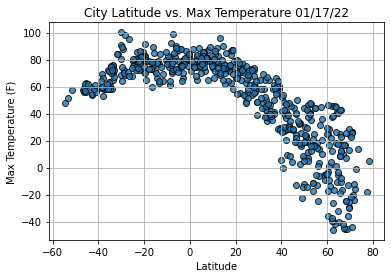

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

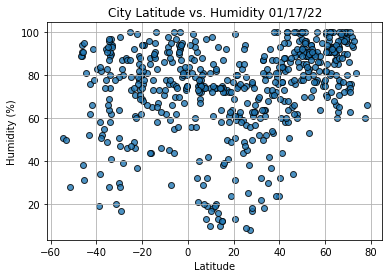

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

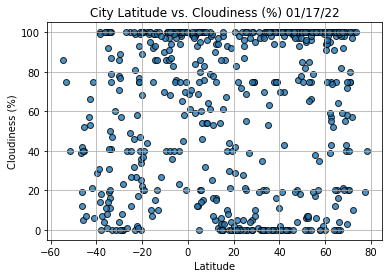

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

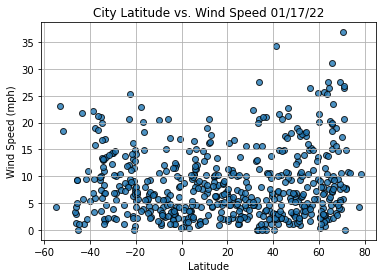

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [30]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [33]:
index13 = city_data_df.loc[13]
index13

City                   Kaitangata
Country                        NZ
Date          2022-01-17 18:13:33
Lat                      -46.2817
Lng                      169.8464
Max Temp                    55.99
Humidity                       94
Cloudiness                     12
Wind Speed                   2.98
Name: 13, dtype: object

In [37]:
city_data_df[(city_data_df['Lat'] >= 0)].head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Kapaa,US,2022-01-17 18:13:29,22.0752,-159.3190,71.58,75,75,5.75
2,Belize,BZ,2022-01-17 18:13:29,17.2500,-88.7500,72.63,50,10,3.42
3,Naze,JP,2022-01-17 18:13:30,28.3667,129.4833,55.81,61,100,15.59
8,Khatanga,RU,2022-01-17 18:13:31,71.9667,102.5000,-15.50,93,10,7.85
9,Gambela,ET,2022-01-17 18:13:32,8.2500,34.5833,79.57,32,96,1.39


In [38]:
northern_hemi_df = city_data_df[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df[(city_data_df['Lat'] < 0)]

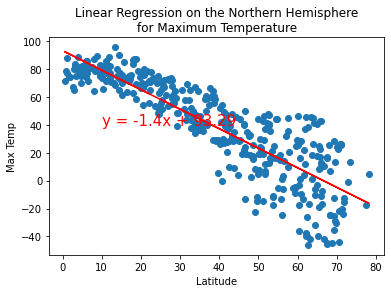

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(10,40))

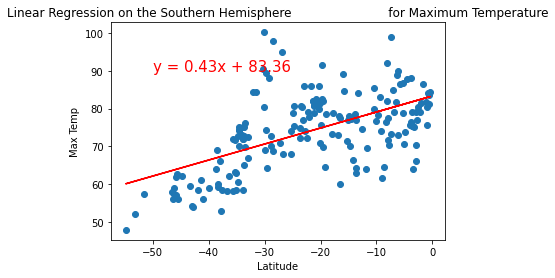

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

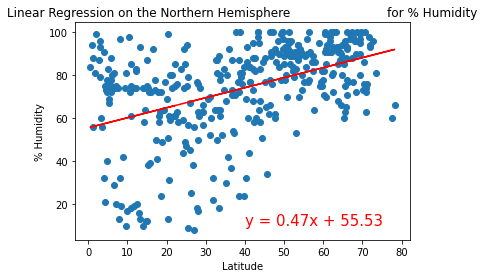

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

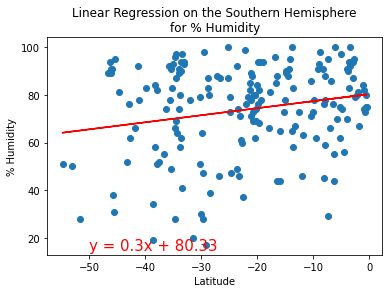

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity', '% Humidity',(-50,15))

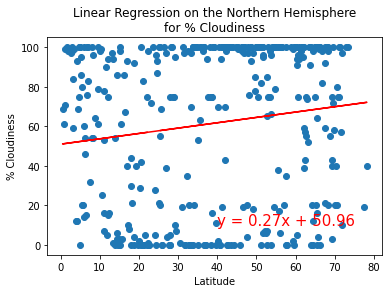

In [51]:
# SKILL DRILL: 6.4.4
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Cloudiness', '% Cloudiness',(40,10))

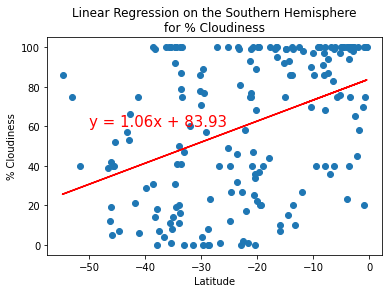

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Cloudiness', '% Cloudiness',(-50,60))

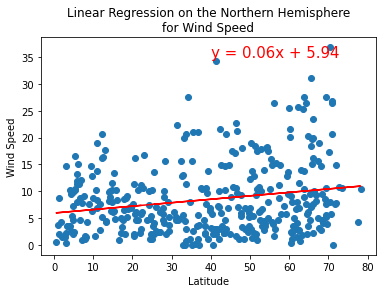

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed',(40,35))